# Session 9 further work

In [2]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Section 3: Representing functions

### Question 1

In [3]:
Npol = 5
coeffs = np.eye(Npol)
Nleg = 5001
xleg = np.linspace(-1,1,Nleg)
# Spacing of grid needed for integral
dx = 2/(Nleg - 1)
integrals = np.zeros((Npol,Npol))
# Now perform integrals for all cross terms
for i in range(Npol):
    for j in range(i,Npol):
        integrals[j,i] = np.sum(np.polynomial.legendre.legval(xleg,coeffs[j]) * 
                                np.polynomial.legendre.legval(xleg,coeffs[i]))*dx
        integrals[i,j] = integrals[j,i]
np.set_printoptions(precision=4)
print(integrals)
print(dx)

[[2.0004e+00 9.0949e-17 4.0008e-04 9.0949e-17 4.0027e-04]
 [9.0949e-17 6.6707e-01 9.0949e-17 4.0019e-04 9.0949e-17]
 [4.0008e-04 9.0949e-17 4.0040e-01 9.0949e-17 4.0035e-04]
 [9.0949e-17 4.0019e-04 9.0949e-17 2.8611e-01 1.0232e-16]
 [4.0027e-04 9.0949e-17 4.0035e-04 1.0232e-16 2.2262e-01]]
0.0004


The functions are orthogonal (given the grid spacing), though it's interesting that there are clear variations in the errors.

### Question 2

Text(0.5, 1.0, 'First five Legendre polynomials')

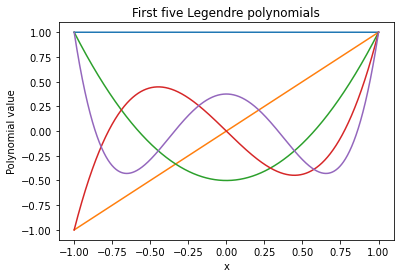

In [4]:
for i in range(Npol):
    plt.plot(xleg,np.polynomial.legendre.legval(xleg,coeffs[i]))
plt.xlabel('x')
plt.ylabel('Polynomial value')
plt.title('First five Legendre polynomials')

### Question 3

In [5]:
from scipy import integrate
Ncheb = 100001
xcheb = np.linspace(-1,1,Ncheb)
dx = 2/(Ncheb-1)
integrals_cheb = np.zeros((Npol,Npol))
# Calculate factor for integrals with care at ends
factor = np.sqrt(1.0-xcheb*xcheb)
factor[0] = 1.0
factor[-1] = 1.0
factor = 1.0/factor
factor[0] = 0.0
factor[-1] = 0.0
for i in range(Npol):
    for j in range(i,Npol):
        integrals_cheb[j,i] = integrate.simps(np.polynomial.chebyshev.chebval(xcheb,coeffs[j]) * 
                                np.polynomial.chebyshev.chebval(xcheb,coeffs[i])*factor,dx=dx)
        integrals_cheb[i,j] = integrals_cheb[j,i]
np.set_printoptions(precision=4)
print(integrals_cheb)

[[ 3.1336e+00  3.3751e-14 -7.9608e-03  3.3640e-14 -7.9607e-03]
 [ 3.3751e-14  1.5628e+00  3.3862e-14 -7.9608e-03  3.3779e-14]
 [-7.9608e-03  3.3862e-14  1.5628e+00  3.3862e-14 -7.9607e-03]
 [ 3.3640e-14 -7.9608e-03  3.3862e-14  1.5628e+00  3.3695e-14]
 [-7.9607e-03  3.3779e-14 -7.9607e-03  3.3695e-14  1.5628e+00]]


As with the Legendre polynomials, we have orthogonal functions (to within integration accuracy) with some structure in the deviations from zero.

### Question 4

Text(0.5, 1.0, 'First five Chebyshev polynomials')

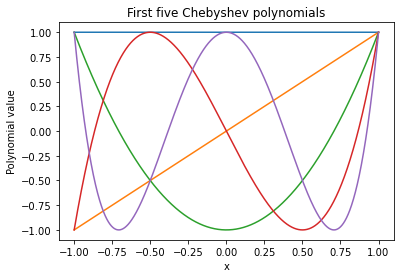

In [6]:
for i in range(Npol):
    plt.plot(xleg,np.polynomial.chebyshev.chebval(xleg,coeffs[i]))
plt.xlabel('x')
plt.ylabel('Polynomial value')
plt.title('First five Chebyshev polynomials')

## 4. Fourier transforms: basics

### Question 1

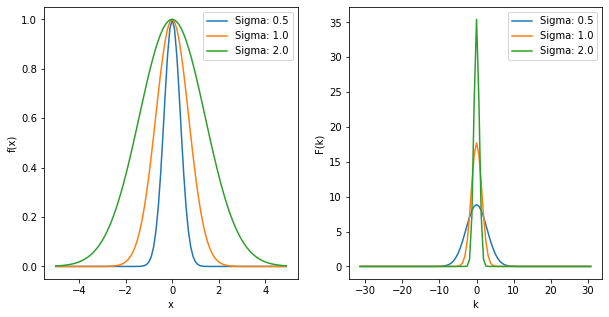

In [7]:
# Set up x values
xming = -5
xmaxg = 5
dxgau = 0.1
nxgau = int((xmaxg - xming)/dxgau)
xgau = np.arange(-5,5,0.1)

# Set up k values
karrg = np.zeros(nxgau)
dkgau = 2*np.pi/10
nkmaxg = int(nxgau/2)
karrg = dkgau*np.arange(-nxgau/2,nxgau/2)

# Set up figures
fig_gau = plt.figure(figsize=(10,5))
ax_gau1 = fig_gau.add_subplot(1,2,1)
ax_gau2 = fig_gau.add_subplot(1,2,2)

# Vary width of Gaussian
for sigma in (0.5,1.0,2.0): 
    ygau = np.exp(-xgau*xgau/(sigma*sigma))
    ax_gau1.plot(xgau,ygau,label='Sigma: {0:3.1f}'.format(sigma))
    FFTgau = np.fft.fft(ygau)
    
    # Shift coefficients to be centred on zero for plotting
    FFTgau_plot = np.zeros_like(FFTgau)
    FFTgau_plot[0:nkmaxg] = FFTgau[nkmaxg:]
    FFTgau_plot[nkmaxg:] = FFTgau[0:nkmaxg]
    ax_gau2.plot(karrg,np.abs(FFTgau_plot),label='Sigma: {0:3.1f}'.format(sigma))
    
ax_gau1.set_xlabel("x")
ax_gau1.set_ylabel("f(x)")
ax_gau1.legend()
ax_gau2.set_xlabel("k")
ax_gau2.set_ylabel("F(k)")
ax_gau2.legend()

### Question 2

Plot the curve to see shape before filtering

629


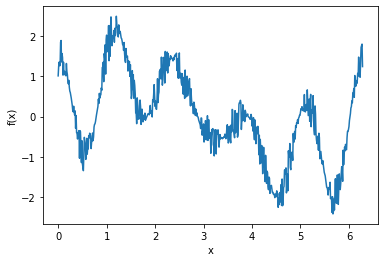

In [9]:
xnoi2 = np.arange(0,2*np.pi,0.01)
ynoi2 = np.sin(xnoi2) + np.cos(5*xnoi2) + np.random.random(len(xnoi2))*np.cos(6*xnoi2)
plt.plot(xnoi2,ynoi2)
plt.xlabel("x")
plt.ylabel("f(x)")

print(np.size(xnoi2))

Text(0, 0.5, 'F(n)')

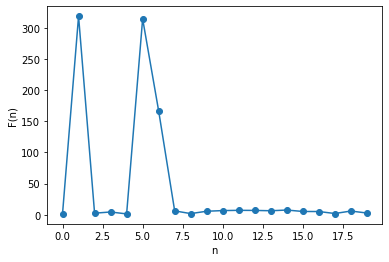

In [7]:
FFTnoi2 = np.fft.fft(ynoi2)
plt.plot(abs(FFTnoi2[:20]),'o-') # First 20 coefficients
plt.xlabel("n")
plt.ylabel("F(n)")

I chose a threshold of 250 below.  We might argue that a threshold of 100 would be better (there is a strong peak at n=6).  If you do that, you'll see that we include the cos(6x) term which might be considered

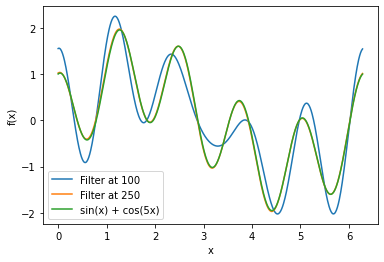

In [8]:
filtFFTnoi2 = np.where(abs(FFTnoi2)>100,FFTnoi2,0.+0j)
ynoiFilt2 = np.fft.ifft(filtFFTnoi2)
plt.plot(xnoi2,ynoiFilt2.real,label='Filter at 100')
filtFFTnoi2 = np.where(abs(FFTnoi2)>250,FFTnoi2,0.+0j)
ynoiFilt2a = np.fft.ifft(filtFFTnoi2)
plt.plot(xnoi2,ynoiFilt2a.real,label='Filter at 250')
plt.plot(xnoi2,np.sin(xnoi2) + np.cos(5*xnoi2),label='sin(x) + cos(5x)')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

### Question 3

Again, we can filter out n>5 or n>6 with the same results as we saw above.  The question we would need to ask in an experimental situation is whether the noisy signal has any significance or whether it is pure noise.  It's also interesting to plot the difference between the filtered signal and the original signal (without noise).  We've introduced some small changes with filtering (at the 1% level)

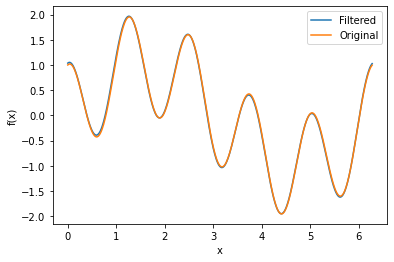

In [10]:
filtFFTnoi2 = np.copy(FFTnoi2)
filtFFTnoi2[6:-5] = 0+0j
ynoiFilt2a = np.fft.ifft(filtFFTnoi2)
plt.plot(xnoi2,ynoiFilt2a.real,label='Filtered')
plt.plot(xnoi2,np.sin(xnoi2) + np.cos(5*xnoi2),label='Original')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

Text(0.5, 1.0, 'Difference between original and filtered signals')

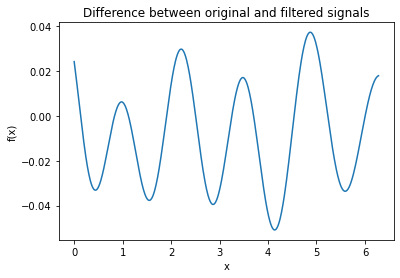

In [23]:
plt.plot(xnoi2,ynoiFilt2a.real-(np.sin(xnoi2) + np.cos(5*xnoi2)))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Difference between original and filtered signals")